The S1210 airfoil was designed for high lift coefficients at low Reynolds numbers, which seems to be of interest for vertical axis wind turbine applications [1, 2]. A slotted variant for VAWTs was analyzed in a wind tunnel and using CFD [3], where the data for this notebook came from. The experimental data is not perticularly close to the results below (which predict  higher lift and lower drag) nor is the experimental data close to the CFD results in paper (which, interestingly, predict lower lift and higher drag).

Regardless, this is an interesting example to show what virtual displacements are good for. They are used to modify smooth geometries to model kinks or otherwise difficult geometries.

In addition, this notebook shows how to interactively plot and show the changes in the solution during the Newton iterations.

<IPython.core.display.Javascript object>


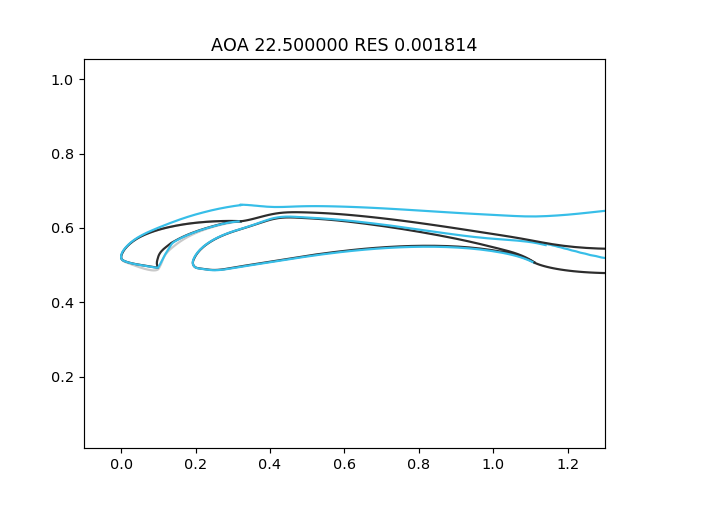

In [1]:
%matplotlib notebook
import viiflow as vf
import viiflowtools.vf_tools as vft
import viiflowtools.vf_plots as vfp
import matplotlib.pyplot as plt
import numpy as np

# Make a plot that will be updated interactively
lines = None
fig,ax = plt.subplots(1,1)

In [2]:
SCALE = 0.9 # Scale Geometry to be comparable to base airfoils
BASE = vft.repanel_spline(vft.read_selig("S1210Base.dat"),160)/SCALE
SLOT = vft.repanel_spline(vft.read_selig("S1210Slot.dat"),160)/SCALE
SLOT0 = vft.read_selig("S1210Slot0.dat")/SCALE # Actual slot shape


# Virtual displacement
[vdSlot,SLOTD] = vft.virtual_displacement_from_geometry(SLOT,SLOT0)
vdSlot[0] = 0.0
vdSlot[-1] = 0.0

# Setup
RE = 200000
ncrit = 5
Mach = 0.0
AOA0 = 5.0
s = vf.setup(RE,Mach,ncrit,AOA0)
s.iterate_wakes = True
s.itermax = 1
s.silent = True

# Set-up and initialize based on inviscid panel solution
(p,bl,x) = vf.init([BASE,SLOT],s)

xn = x.copy()
alv = []
clv = []
cdv = []

for alpha in np.arange(AOA0,23,0.5):
    s.alpha = alpha
    res = None
    grad = None
    for k in range(int(100/s.itermax)): # Make effectively 100 iterations, but show some in between
        [xn,flag,res,grad,info,gam_virtual_delta,CD_virtual_delta,CL_virtual_delta,gam_x,res_virtual_delta] = vf.iter(xn,bl,p,s,res,grad,[None,vdSlot])
        
        # Plot geometry
        lines = vfp.plot_geometry(ax,[BASE,SLOT,p.wakes[0].X,p.wakes[1].X],lines,
                    [bl[0].bl_fl.nodes.delta,bl[1].bl_fl.nodes.delta,-bl[0].bl_wk.nodes.delta,-bl[1].bl_wk.nodes.delta],
                    [None,vdSlot,None,None])
        nres=np.sqrt(np.dot(res.T,res))
        title = "AOA %f RES %f"%(alpha,nres)
        ax.set_title(title)
        ax.set_xlim([-.1,1.3])
        fig.canvas.draw()
        if nres<2e-3:
            alv.append(alpha)
            clv.append(p.CL)
            cdv.append(bl[0].CD[0]+bl[1].CD[0])
            print('AL: %f CL: %f CD: %f' % (alpha,clv[-1],cdv[-1]) ) 
            break


AL: 5.000000 CL: 1.642959 CD: 0.029031
AL: 5.500000 CL: 1.699488 CD: 0.028841

AL: 6.000000 CL: 1.752492 CD: 0.028932























































AL: 6.500000 CL: 1.806566 CD: 0.029338
AL: 7.000000 CL: 1.853386 CD: 0.029863
AL: 7.500000 CL: 1.908704 CD: 0.030492
AL: 8.000000 CL: 1.962860 CD: 0.031427
AL: 8.500000 CL: 2.016161 CD: 0.032216
AL: 9.000000 CL: 2.068611 CD: 0.033152
AL: 9.500000 CL: 2.119360 CD: 0.034240
AL: 10.000000 CL: 2.162793 CD: 0.035735
AL: 10.500000 CL: 2.216548 CD: 0.036950
AL: 11.000000 CL: 2.266037 CD: 0.038288
AL: 11.500000 CL: 2.314270 CD: 0.039621
AL: 12.000000 CL: 2.361975 CD: 0.040721
AL: 12.500000 CL: 2.409322 CD: 0.042089
AL: 13.000000 CL: 2.455782 CD: 0.043523
AL: 13.500000 CL: 2.501176 CD: 0.045375
AL: 14.000000 CL: 2.547245 CD: 0.047327
AL: 14.500000 CL: 2.590411 CD: 0.050673
AL: 15.500000 CL: 2.677928 CD: 0.058246
AL: 16.000000 CL: 2.721470 CD: 0.062124
AL: 16.500000 CL: 2.766210 CD: 0.066469
AL: 17.000000 CL: 2.810543 CD: 0.070529
AL: 17.500000 CL: 2.850527 CD: 0.075758
AL: 18.000000 CL: 2.894642 CD: 0.082039
AL: 18.500000 CL: 2.937424 CD: 0.088244
AL: 19.500000 CL: 3.023332 CD: 0.10

<IPython.core.display.Javascript object>


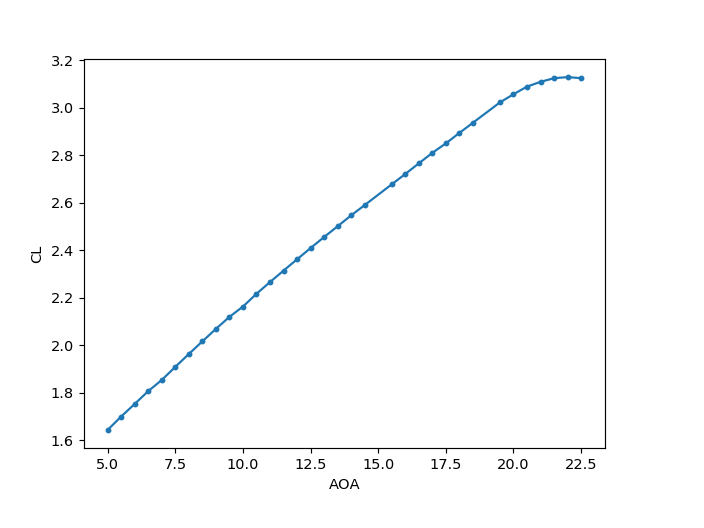

<IPython.core.display.Javascript object>


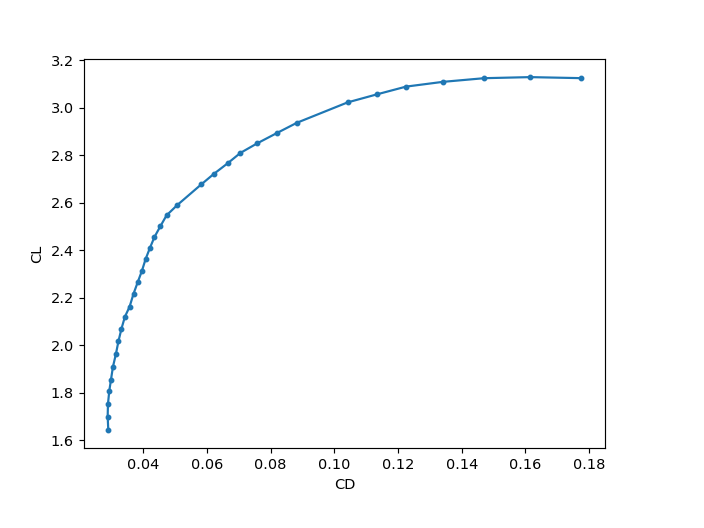

In [3]:
# Make a new plot with the results
fig,ax = plt.subplots(1,1)
ax.plot(alv,clv,marker=".")
ax.set_xlabel('AOA')
ax.set_ylabel('CL')
fig,ax = plt.subplots(1,1)
ax.plot(cdv,clv,marker=".")
ax.set_xlabel('CD')
ax.set_ylabel('CL');

[1] Islam, Mazharul, et al. *Investigation of low reynolds number airfoils for fixed-pitch straight-bladed VAWT.* 47th AIAA Aerospace Sciences Meeting including The New Horizons Forum and Aerospace Exposition. 2009.

[2] Singh, M. A., A. Biswas, and R. D. Misra. *Investigation of self-starting and high rotor solidity on the performance of a three S1210 blade H-type Darrieus rotor.* Renewable energy 76 (2015): 381-387.

[3] Chougule, Prasad, and Søren RK Nielsen. *Simulation of flow over double-element airfoil and wind tunnel test for use in vertical axis wind turbine.* Journal of Physics: Conference Series. Vol. 524. No. 1. IOP Publishing, 2014.